<a href="https://colab.research.google.com/github/wlopezm-unal/World-population-1950-2100/blob/main/Modelo_machine_learning_diabetis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de machine learning para predicción de diabetis.

Objetivo

El propósito de este cuaderno de códigos es limpiar los datos BRFSS en un formato utilizable para algoritmos de aprendizaje automático. El conjunto de datos originalmente tiene 330 características (columnas), pero según la investigación sobre la enfermedad de la diabetes sobre los factores que influyen en la enfermedad de la diabetes y otras afecciones de salud crónicas, en este análisis solo se incluyen características seleccionada:

-Blood pressure (high)
-Cholesterol (high)
-Smoking
-Diabetes
-Obesity
-Age
-Sex
-Race
-Diet
-Exercise
-Alcohol consumption
-BMI
-Household Income
-Marital Status
-Sleep
-Time since last checkup
-Education
-Health care coverage
-Mental Health

La base de datos se obtuvo de la pagina de kaggel : https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
from sklearn.model_selection import train_test_split

*Cargar los datos*

In [ ]:
df=pd.read_csv('/content/diabetes_binary_health_indicators_BRFSS2015.csv')
#it know of class type  of each element in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.describe() # describe value stadistic

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Data Preprocessing

In [ ]:
#Checking for null values
df.isnull().sum().sum()

0

In [ ]:
#Checking for duplicated
df.duplicated().sum()

24206

In [ ]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(229474, 22)

In [ ]:
df['Diabetes'] = df['Diabetes_binary']
df.drop(columns = 'Diabetes_binary', inplace=True)

In [ ]:
# Value count for each value
for i in df.columns:
    print(i,'\n',df[i].value_counts())
    print('-'*90)

HighBP 
 0.0    125214
1.0    104260
Name: HighBP, dtype: int64
------------------------------------------------------------------------------------------
HighChol 
 0.0    128129
1.0    101345
Name: HighChol, dtype: int64
------------------------------------------------------------------------------------------
CholCheck 
 1.0    220176
0.0      9298
Name: CholCheck, dtype: int64
------------------------------------------------------------------------------------------
BMI 
 27.0    21514
26.0    17775
24.0    16497
28.0    14914
25.0    14793
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
------------------------------------------------------------------------------------------
Smoker 
 0.0    122585
1.0    106889
Name: Smoker, dtype: int64
------------------------------------------------------------------------------------------
Stroke 
 0.0    219190
1.0     10284
Name: Stroke, dtype: int64
-------------------

In [ ]:
#Change dtype to int
df = df.astype('int32')

<Axes: >

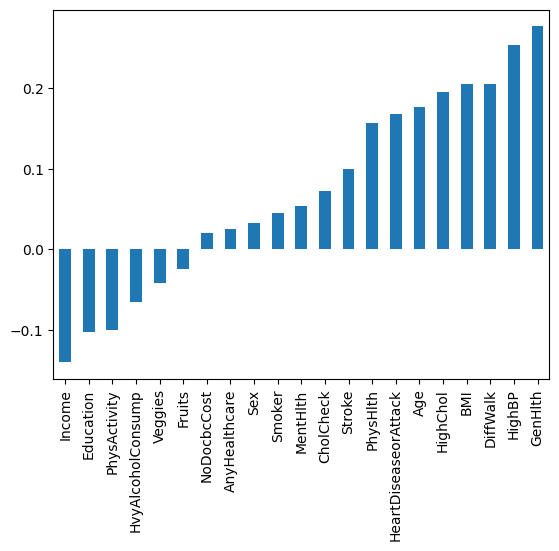

In [ ]:
#Plot correlation between the variables and Diabetes_binary
df.corr()['Diabetes'][:-1].sort_values().plot(kind='bar')


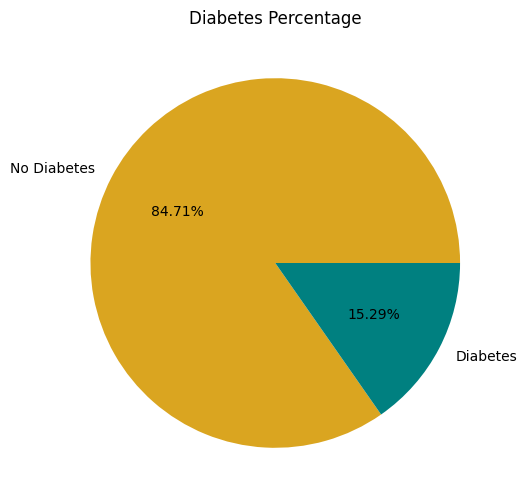

In [ ]:
#Plot pie chart to show HeartDisease Percentage
plt.figure(figsize=(10,6))
plt.pie(df['Diabetes'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%', colors=['goldenrod', 'teal'])
plt.title('Diabetes Percentage')
plt.show()

Age and Diabetes

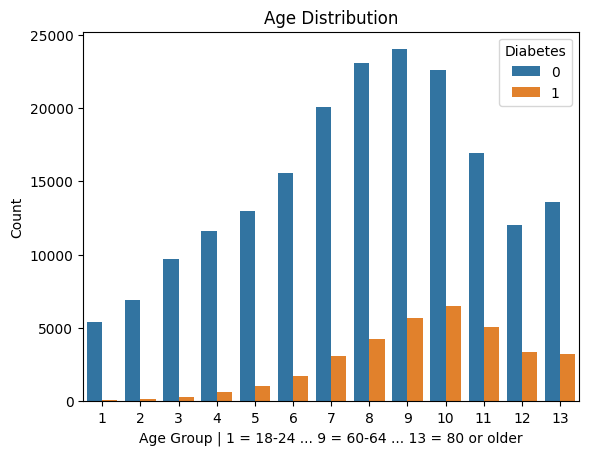

In [ ]:
# Age group distribution
sns.countplot(x='Age', data=df, hue='Diabetes')
plt.title('Age Distribution')
plt.xlabel('Age Group | 1 = 18-24 ... 9 = 60-64 ... 13 = 80 or older')
plt.ylabel('Count')
plt.show()

Countplot shows relation between Age and Diabetes.Elderly people are at high risk of diabetes

In [ ]:
# Split Diabetics
Diabetics = df.where(df.Diabetes == 1)
Diabetics.dropna(inplace=True)

Sex and Diabetes

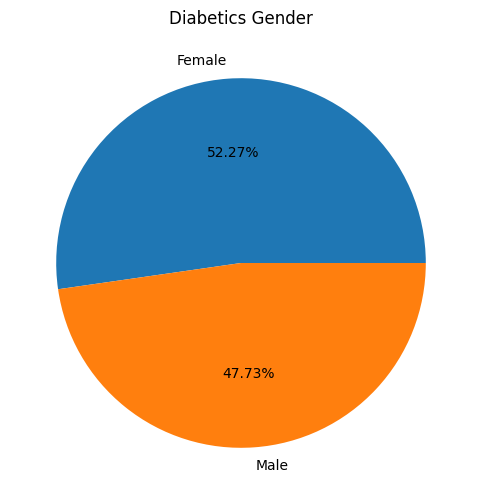

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(Diabetics['Sex'].value_counts(), labels=['Female','Male'] , autopct='%1.2f%%')
plt.title('Diabetics Gender')
plt.show()

High Cholesterol and Diabetes

Text(0.5, 1.0, 'High Cholesterol in Diabetes pation')

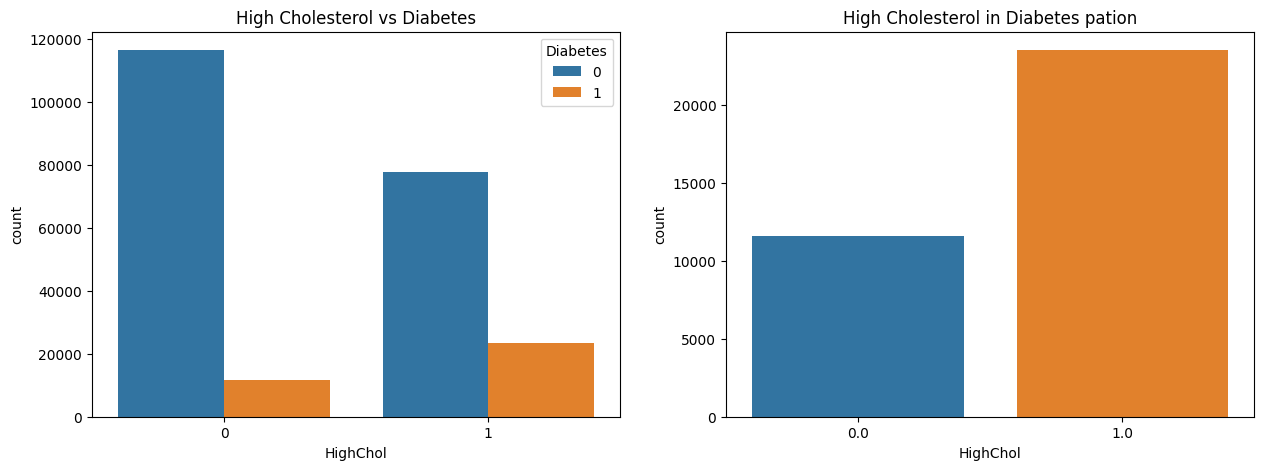

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighChol', data=df, hue='Diabetes', ax=ax[0]).set_title('High Cholesterol vs Diabetes')
sns.countplot(x='HighChol', data=Diabetics, ax=ax[1]).set_title('High Cholesterol in Diabetes pation')

Difficulty walking or climbing and Diabetes

Text(0.5, 1.0, 'Difficulty in walking or climbing in Diabetes pation')

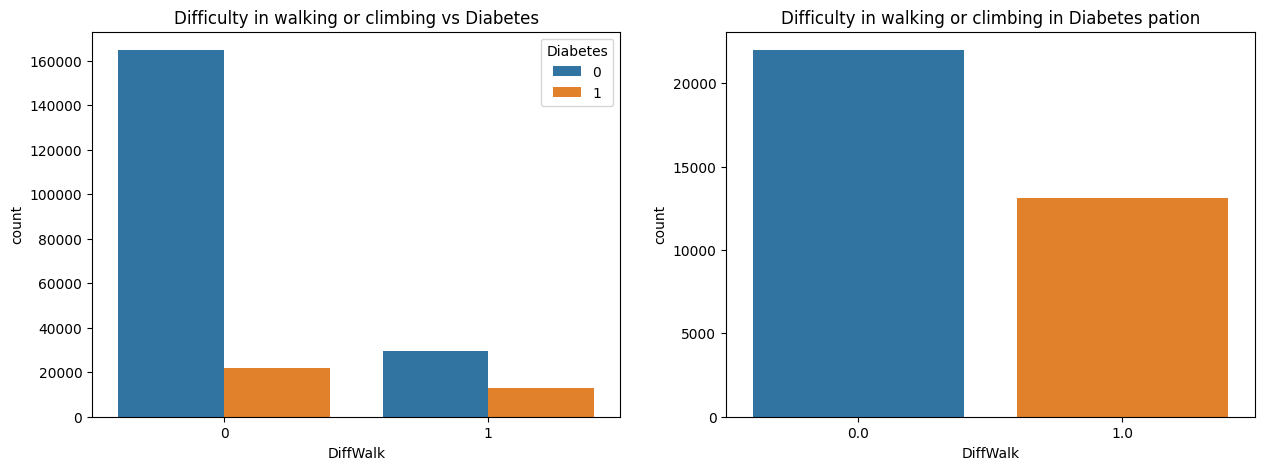

In [ ]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='DiffWalk', data=df, hue='Diabetes', ax=ax[0]).set_title('Difficulty in walking or climbing vs Diabetes')
sns.countplot(x='DiffWalk', data=Diabetics, ax=ax[1]).set_title('Difficulty in walking or climbing in Diabetes pation')

High blood pressure and Diabetes

Text(0.5, 1.0, 'High blood pressure in Diabetes pation')

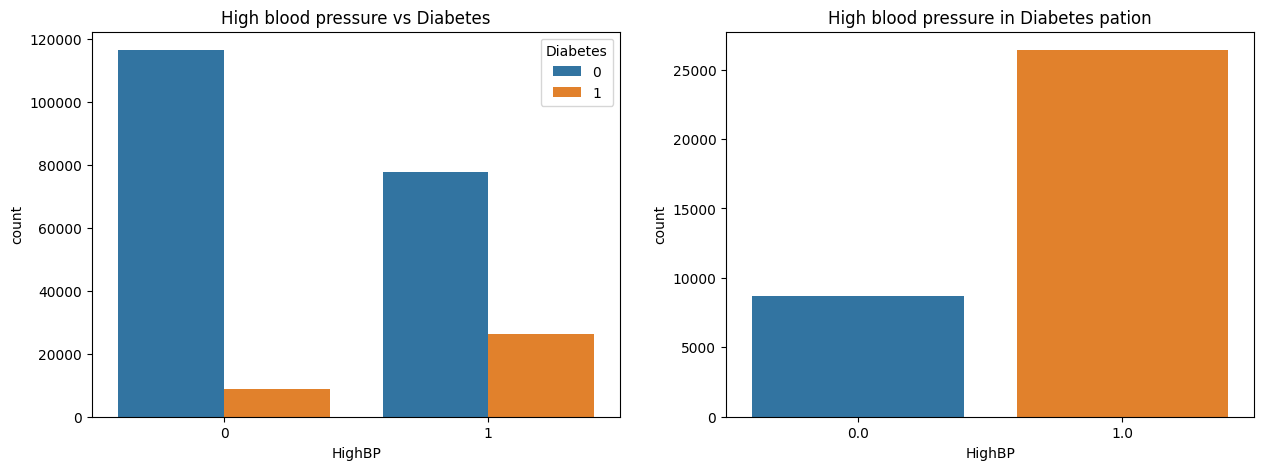

In [ ]:
# HighBP and Diabetes
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HighBP', data=df, hue='Diabetes', ax=ax[0]).set_title('High blood pressure vs Diabetes')
sns.countplot(x='HighBP', data=Diabetics, ax=ax[1]).set_title('High blood pressure in Diabetes pation')

In [ ]:
Diabetics['GenHlth'].value_counts().sort_values(ascending=False)

3.0    13324
4.0     9781
2.0     6280
5.0     4577
1.0     1135
Name: GenHlth, dtype: int64

# BMI and Diabetes

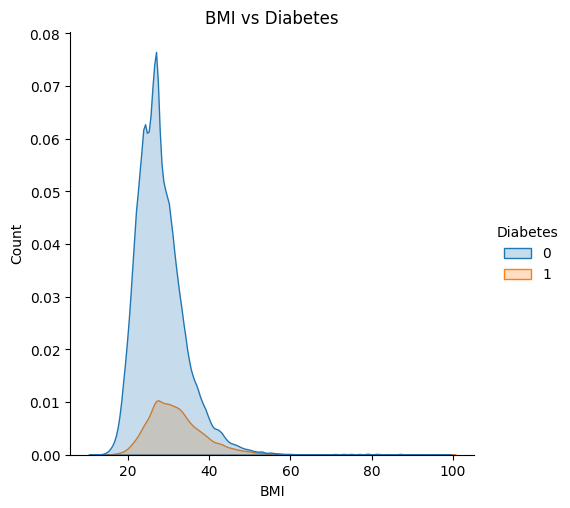

In [ ]:
# BMI and Diabetes
sns.displot(df, x="BMI", hue="Diabetes", kind="kde", fill=True)
plt.title('BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'BloodPressure vs Diabetes')

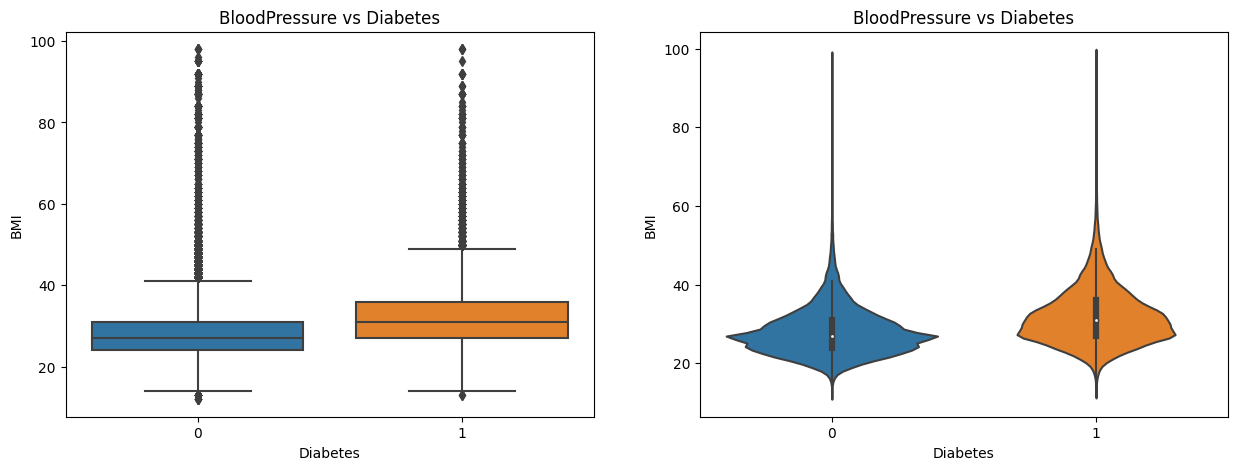

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Diabetes', y='BMI', data=df, ax=ax[0]).set_title('BloodPressure vs Diabetes')
sns.violinplot(x='Diabetes', y='BMI', data=df, ax=ax[1]).set_title('BloodPressure vs Diabetes')

Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

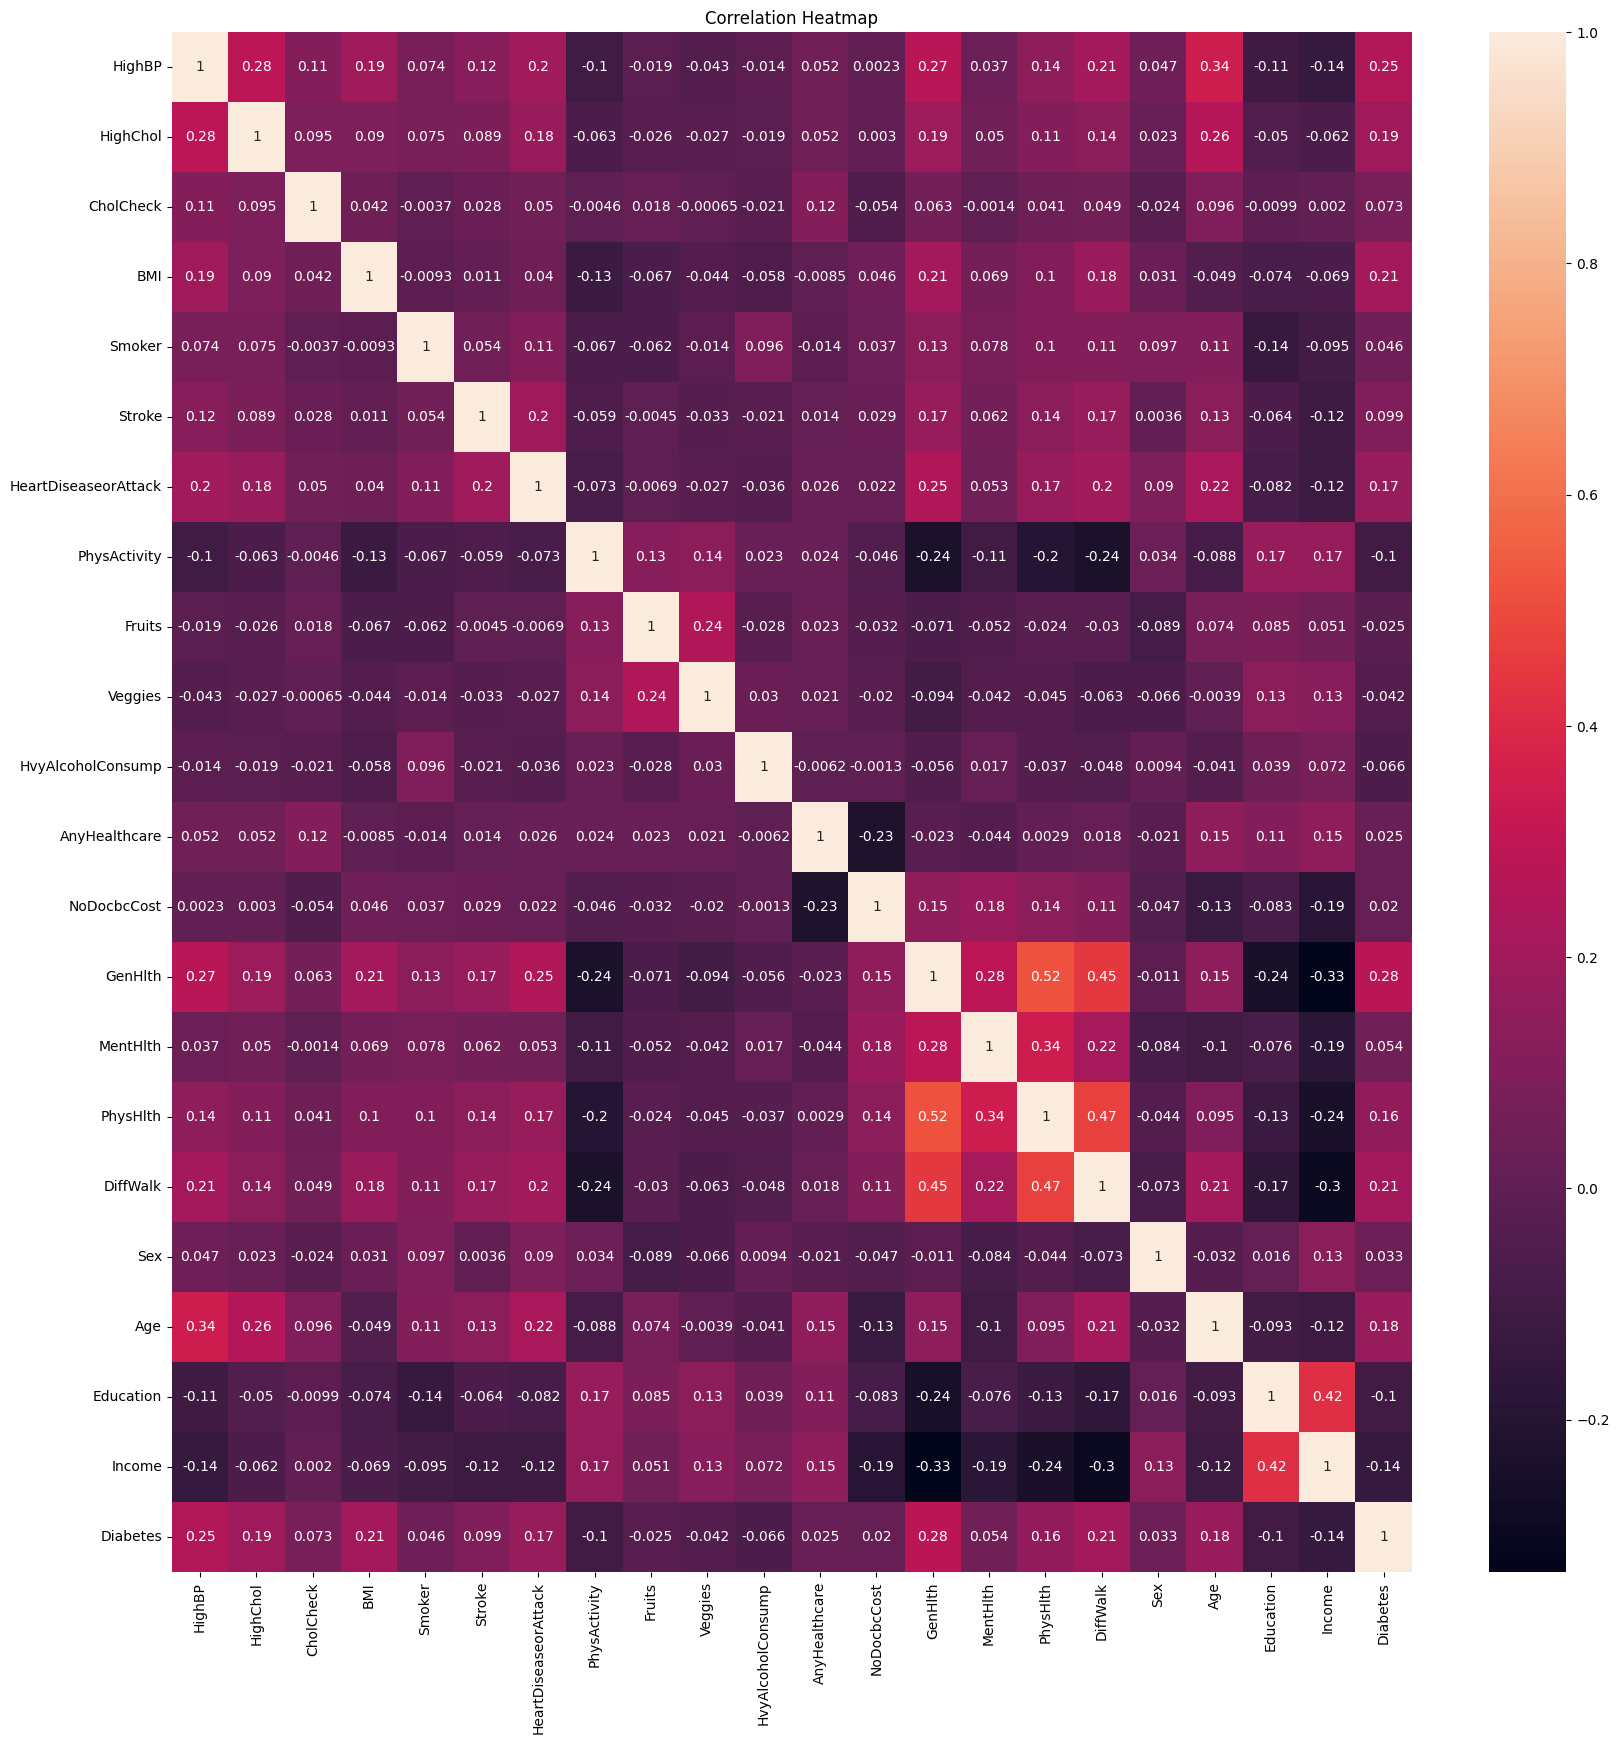

In [ ]:
#correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Diabetes', axis=1), df['Diabetes'], test_size=0.2, random_state=42)

# Model Training

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_slover = ''
train_score = np.zeros(6)
for i, n in enumerate(solver):
    lr = LogisticRegression(solver=n, max_iter=1000).fit(X_train, y_train)
    train_score[i] = lr.score(X_test, y_test)
    if lr.score(X_test, y_test) == train_score.max():
        best_slover = n

lr = LogisticRegression(solver=best_slover,  max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f'LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')

LogisticRegression Score: 0.8491121037150017


Naive bayes

In [ ]:
from sklearn import svm
kernel=['rbf', 'linear']

modelsvc=svm.SVC(kernel='linear', C=10, gamma=0.1)
modelsvc.fit(X_train, y_train)

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
Ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train, y_train)
dtc_pred = Ctree.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, dtc_pred))

DecisionTrees's Accuracy:  0.7209935722845626


In [ ]:
export_grapviz=(Ctree , out_file='df.dot', class_names=df.target_names,feature_names=df.feature_names, impurity=False, filled=True)

SyntaxError: ignored

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
df.columns[:-1]

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
export_graphviz(Ctree, out_file='tree.dot', feature_names=df.columns[:-1],  impurity=False, filled=True)

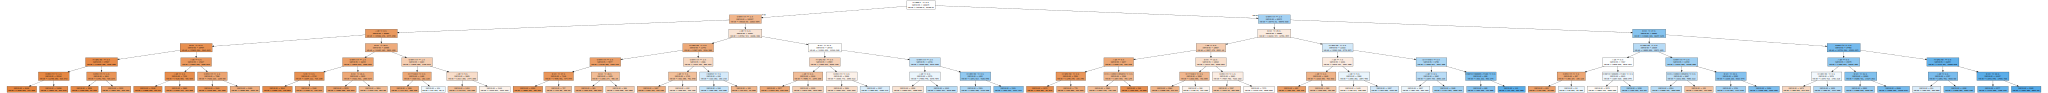

In [ ]:
with open('tree.dot') as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

# **Models Evaluation**

Evaluating Logistic Regression Model

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print('Accuracy Score :', accuracy_score(y_test, lr_pred))
print('f1 Score :', f1_score(y_test, lr_pred, average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, lr_pred))
print('R2 Score : ',r2_score(y_test, lr_pred))

Accuracy Score : 0.8491121037150017
f1 Score : 0.8109108999192032
Mean Absolute Error : 0.15088789628499838
Mean Squared Error :  0.15088789628499838
R2 Score :  -0.15625072283206687


Evaluating DecisionTree Model

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
print('Accuracy Score :', accuracy_score(y_test, dtc_pred))
print('f1 Score :', f1_score(y_test, dtc_pred, average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(y_test, dtc_pred))
print('Mean Squared Error : ',mean_squared_error(y_test, dtc_pred))
print('R2 Score : ',r2_score(y_test, dtc_pred))

Accuracy Score : 0.7209935722845626
f1 Score : 0.7567270217569475
Mean Absolute Error : 0.27900642771543743
Mean Squared Error :  0.27900642771543743
R2 Score :  -1.13802028965554


Comparing the models

Text(0.5, 1.0, 'f1_score')

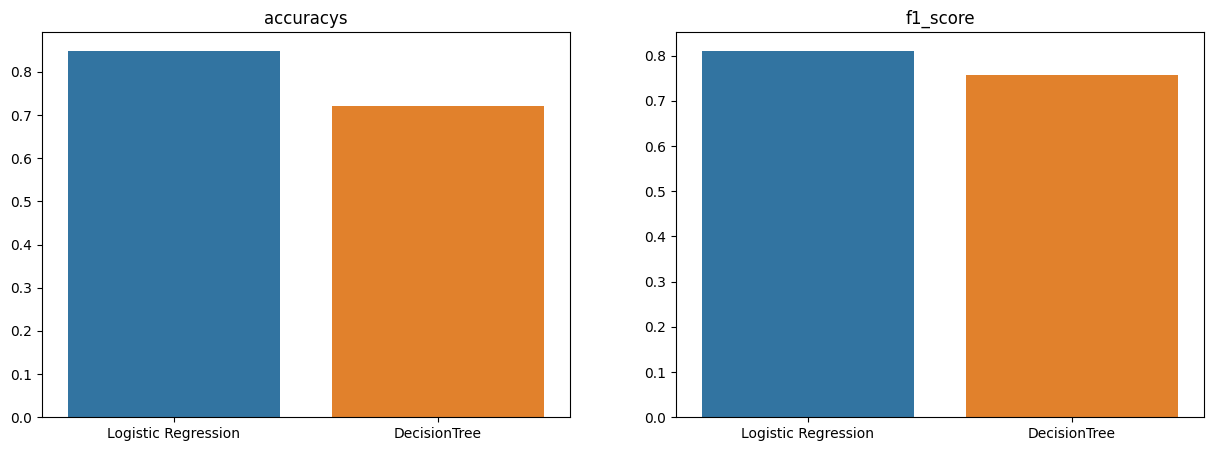

In [ ]:
#comparing the accuracy of different models
models = ['Logistic Regression','DecisionTree']
preds = [lr_pred,dtc_pred]
accuracys= []
f1 = []
for i in preds:
    accuracys.append( accuracy_score(y_test, i))
    f1.append(f1_score(y_test, i, average="weighted"))
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=models, y=accuracys, ax=ax[0]).set_title('accuracys')
sns.barplot(x=models, y=f1, ax=ax[1]).set_title('f1_score')